In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
n = ['Class','Alcohol','Malic_acid','Ash','Alcalinity_ash','Mg','Phenols','Flavanoids','Nonflavanoid_phenols','Proanthocyanins','Color_intensity','Hue','OD280/OD315','Proline']

url = 'https://raw.githubusercontent.com/Amnuaysak/HomeWork_codecamp_5/master/KNN%20%26%20Classifying%20wine%20varieties/Wine.csv'
df = pd.read_csv(url,header=None,names=n)

# Basic Information (all-features)

## (Before) Normalization-MinMaxScaler/Standardize-StandardScaler

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic_acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity_ash        178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD280/OD315           178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [0]:
df.describe()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_ash,Mg,Phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [0]:
df.head(10)

,Class,Alcohol,Malic_acid,Ash,Alcalinity_ash,Mg,Phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [0]:
df.tail(10)

,Class,Alcohol,Malic_acid,Ash,Alcalinity_ash,Mg,Phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
168,3,13.58,2.58,2.69,24.5,105,1.55,0.84,0.39,1.54,8.660000,0.74,1.80,750
169,3,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.500000,0.67,1.92,630
170,3,12.20,3.03,2.32,19.0,96,1.25,0.49,0.40,0.73,5.500000,0.66,1.83,510
171,3,12.77,2.39,2.28,19.5,86,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470
172,3,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.700000,0.62,1.71,660
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.700000,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.300000,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.200000,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.300000,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.200000,0.61,1.60,560


In [0]:
df.sample(4)

,Class,Alcohol,Malic_acid,Ash,Alcalinity_ash,Mg,Phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
47,1,13.90,1.68,2.12,16.0,101,3.10,3.39,0.21,2.14,6.1,0.91,3.33,985
151,3,12.79,2.67,2.48,22.0,112,1.48,1.36,0.24,1.26,10.8,0.48,1.47,480
127,2,11.79,2.13,2.78,28.5,92,2.13,2.24,0.58,1.76,3.0,0.97,2.44,466
58,1,13.72,1.43,2.50,16.7,108,3.40,3.67,0.19,2.04,6.8,0.89,2.87,1285


### Plot

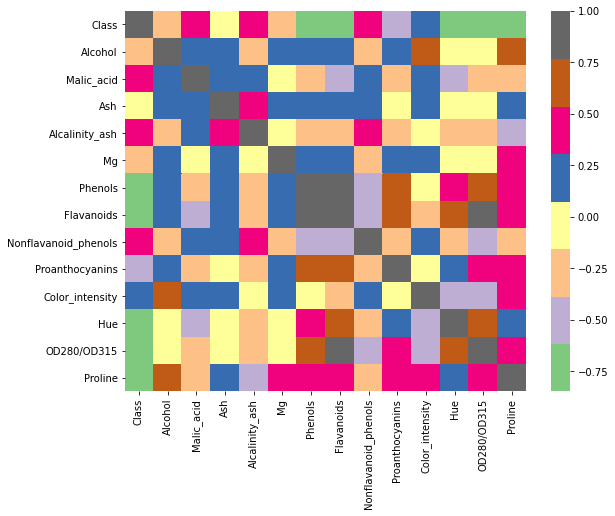

In [0]:
fig = plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),cmap='Accent')

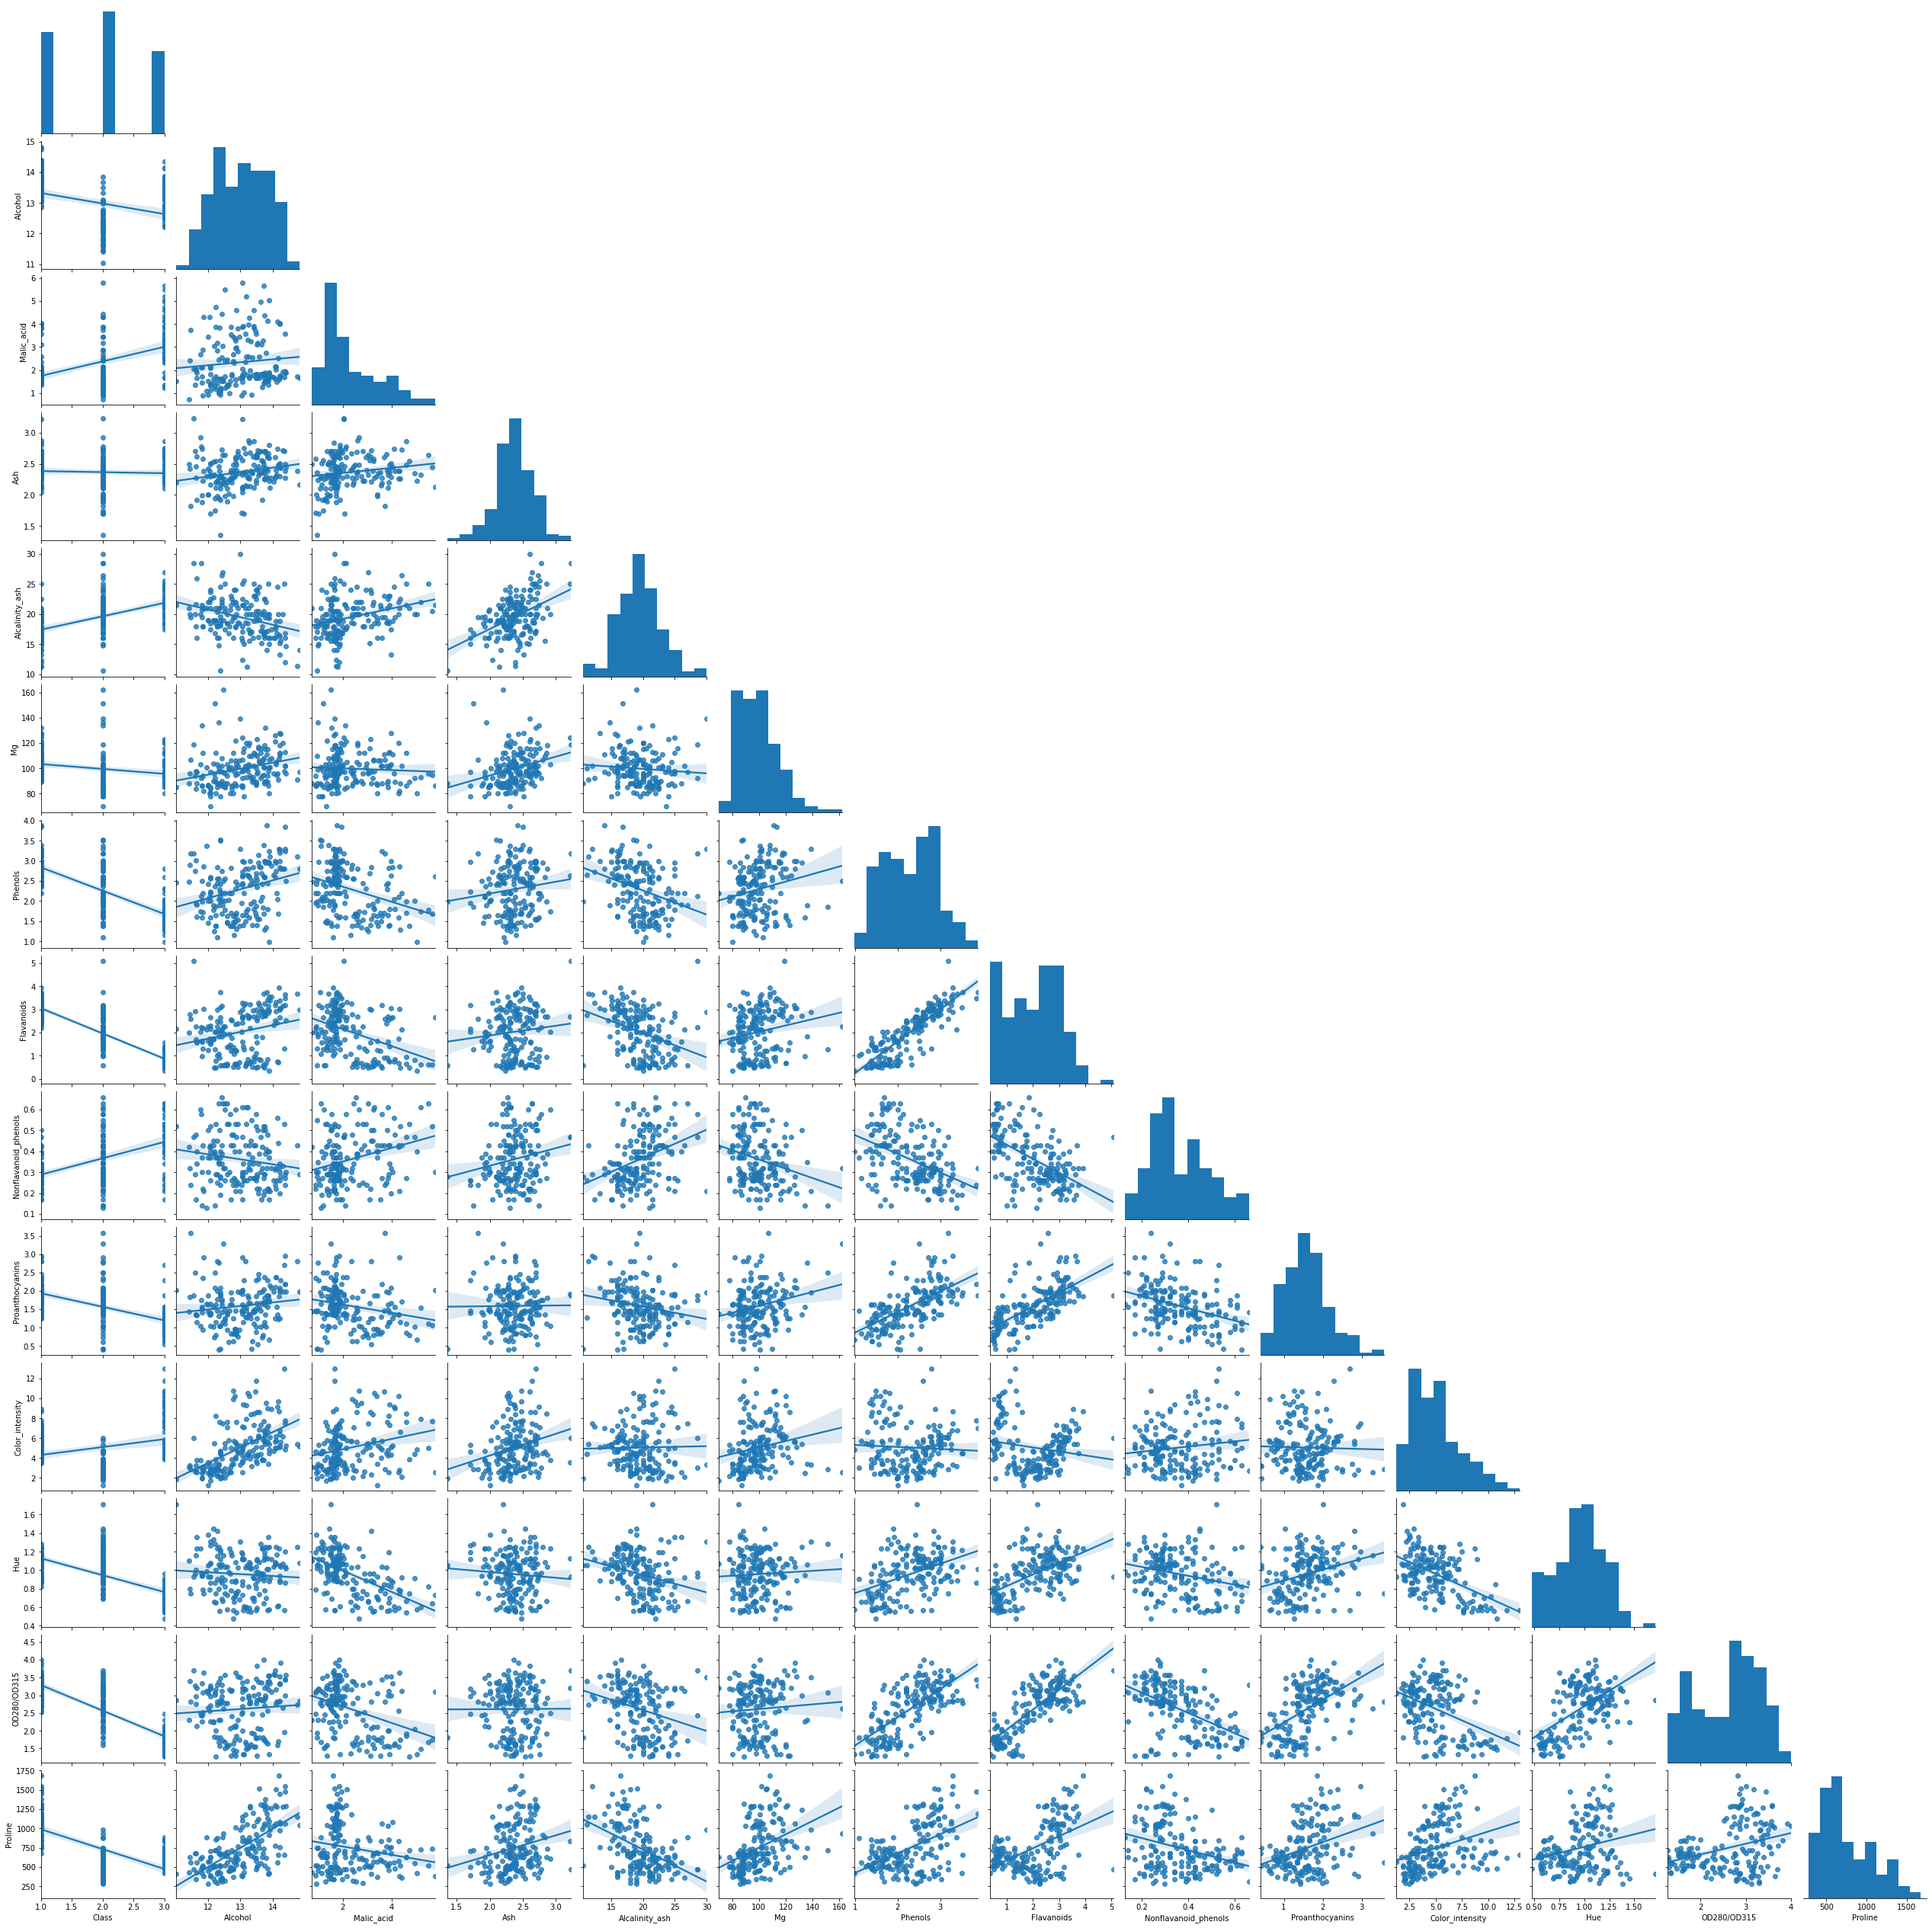

In [0]:
sns.pairplot(df,kind='reg',corner=True)

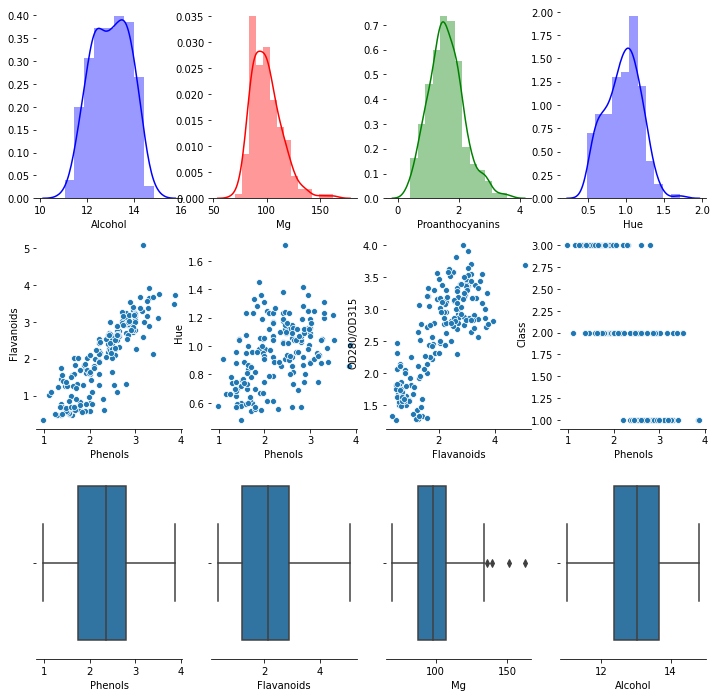

In [0]:
f, axes = plt.subplots(3, 4, figsize=(12, 12), sharex=False)
sns.despine(left=True)

sns.distplot(df['Alcohol'], kde=True, color="b", ax=axes[0,0])
sns.distplot(df['Mg'], kde=True, color="r", ax=axes[0,1])
sns.distplot(df['Proanthocyanins'], kde=True, color="g", ax=axes[0,2])
sns.distplot(df['Hue'], kde=True, color="b", ax=axes[0,3])

sns.scatterplot(x='Phenols',y='Flavanoids',data=df, ax=axes[1, 0])
sns.scatterplot(x='Phenols',y='Hue',data=df, ax=axes[1, 1])
sns.scatterplot(x='Flavanoids',y='OD280/OD315',data=df, ax=axes[1, 2])
sns.scatterplot(x='Phenols',y='Class',data=df, ax=axes[1, 3])

sns.boxplot(df['Phenols'],ax=axes[2, 0])
sns.boxplot(df['Flavanoids'],ax=axes[2, 1])
sns.boxplot(df['Mg'],ax=axes[2, 2])
sns.boxplot(df['Alcohol'],ax=axes[2, 3])

## Normalization-MinMaxScaler

In [0]:
min_max_scaler = MinMaxScaler()
df_norm = min_max_scaler.fit_transform(df.drop(['Class'],axis = 1))
norm_df = pd.DataFrame(df_norm,columns=df.columns[1:])
norm_df.sample(5)

,Alcohol,Malic_acid,Ash,Alcalinity_ash,Mg,Phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
116,0.207895,0.144269,0.336898,0.525773,0.173913,0.344828,0.265823,0.320755,0.353312,0.057167,0.382114,0.754579,0.154779
31,0.671053,0.181818,0.534759,0.438144,0.391304,0.648276,0.601266,0.169811,0.485804,0.479522,0.495935,0.589744,0.882311
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
145,0.560526,0.559289,0.422460,0.536082,0.347826,0.179310,0.044304,0.566038,0.280757,0.232082,0.097561,0.150183,0.393723
102,0.344737,0.337945,0.588235,0.536082,0.304348,0.544828,0.373418,0.396226,0.283912,0.129693,0.260163,0.772894,0.114123


## Standardize-StandardScaler

In [0]:
stand_scaler = StandardScaler()
df_stad = stand_scaler.fit_transform(df.drop(['Class'],axis=1))
stad_df = pd.DataFrame(df_stad,columns=df.columns[1:])
stad_df.sample(5)

,Alcohol,Malic_acid,Ash,Alcalinity_ash,Mg,Phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
5,1.481555,-0.517367,0.305159,-1.289707,0.860705,1.562093,1.366128,-0.176095,0.664217,0.731870,0.406051,0.336606,2.239039
58,0.888627,-0.813595,0.487926,-0.839280,0.579852,1.770396,1.647239,-1.384766,0.786863,0.753498,-0.295924,0.364855,1.713598
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
14,1.703902,-0.418624,0.049285,-2.250619,0.158572,1.610163,1.617120,-0.578985,2.398780,1.056297,1.064151,0.548472,2.547935
99,-0.877801,0.748338,-0.572122,-0.448909,-0.824415,0.889114,0.964541,0.710264,2.135968,-1.193067,2.029366,0.308357,-1.085572


# sklearn-KNN (all-features)

## Normalization

In [0]:
X_train , X_test,y_train,y_test = train_test_split(norm_df,df['Class'],train_size = 0.8,random_state=100)
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
y_predict = knn.predict(X_test)

###Model Evaluation

In [0]:
confusion_matrix(y_test,y_predict)

array([[ 8,  0,  0],
       [ 1, 12,  2],
       [ 0,  0, 13]])

In [0]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'micro'),precision_score(y_test,y_predict,average = 'micro'),recall_score(y_test,y_predict,average = 'micro')

(0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666)

In [0]:
accuracy_list=[]
for i in range (1,30):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train,y_train)
  yi_predict = knn.predict(X_test)
  accuracy_list.append(accuracy_score(y_test,yi_predict))

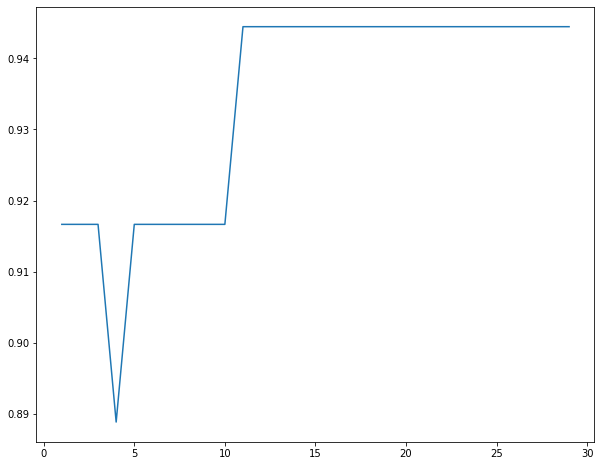

In [0]:
plt.figure(figsize=(10,8))
plt.plot(range (1,30),accuracy_list)

In [0]:
y_predict = knn.predict(X_test)

## Standardize

In [0]:
X_train , X_test,y_train,y_test = train_test_split(stad_df,df['Class'],train_size = 0.8,random_state=100)
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
y_predict = knn.predict(X_test)

###Model Evaluation

In [0]:
confusion_matrix(y_test,y_predict)

array([[ 8,  0,  0],
       [ 1, 12,  2],
       [ 0,  0, 13]])

In [0]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'micro'),precision_score(y_test,y_predict,average = 'micro'),recall_score(y_test,y_predict,average = 'micro')

(0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666)

In [0]:
accuracy_list=[]
for i in range (1,30):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train,y_train)
  yi_predict = knn.predict(X_test)
  accuracy_list.append(accuracy_score(y_test,yi_predict))

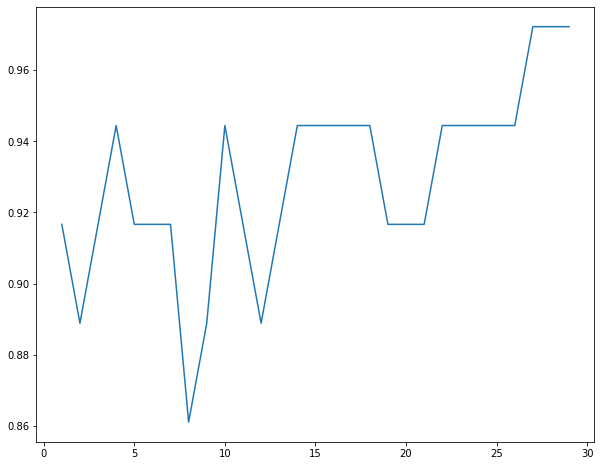

In [0]:
plt.figure(figsize=(10,8))
plt.plot(range (1,30),accuracy_list)

# Basic Information-case1 (drop['Phenols','Flavanoids','Hue','OD280/OD315',	'Proline'])

---





## (Before) Normalization-MinMaxScaler/Standardize-StandardScaler (case1)

In [0]:
df_case1 = df.drop(['Phenols','Flavanoids','Hue','OD280/OD315', 'Proline'],axis=1)

## Standardize-StandardScaler (case1)

In [0]:
stand_scaler = StandardScaler()
df_stad_1 = stand_scaler.fit_transform(df_case1.drop(['Class'],axis=1))
stad_df_1 = pd.DataFrame(df_stad_1,columns=df_case1.columns[1:])
stad_df_1.sample(5)

,Alcohol,Malic_acid,Ash,Alcalinity_ash,Mg,Nonflavanoid_phenols,Proanthocyanins,Color_intensity
97,-0.877801,-0.831549,-1.412851,-1.049479,-1.035055,-0.578985,0.313800,-0.933525
15,0.777454,-0.472483,1.218995,-0.689137,0.860705,-0.498407,-0.229346,0.969783
112,-1.532492,0.308483,2.023170,0.151661,0.228785,1.918935,-0.947700,-0.544212
86,-1.038386,-0.652016,-0.206588,0.992459,-0.683988,0.549108,-0.054137,-1.128181
177,1.395086,1.583165,1.365208,1.502943,-0.262708,1.596623,-0.422075,1.791666


# sklearn-KNN (case1)

## Standardize

In [0]:
X_train , X_test,y_train,y_test = train_test_split(stad_df_1,df_case1['Class'],train_size = 0.8,random_state=100)
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
y_predict = knn.predict(X_test)

In [0]:
y_predict

array([2, 3, 1, 2, 3, 3, 2, 3, 2, 2, 3, 1, 3, 3, 3, 1, 1, 1, 3, 1, 3, 1,
       3, 2, 1, 1, 2, 2, 2, 3, 3, 2, 1, 2, 3, 3])

###Model Evaluation

In [0]:
confusion_matrix(y_test,y_predict)

array([[ 8,  0,  0],
       [ 1, 11,  3],
       [ 1,  0, 12]])

In [0]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'micro'),precision_score(y_test,y_predict,average = 'micro'),recall_score(y_test,y_predict,average = 'micro')

(0.8611111111111112,
 0.8611111111111112,
 0.8611111111111112,
 0.8611111111111112)